In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.DataFrame(pd.read_csv("listings.csv", low_memory = "false"))

In [3]:
#The analysis will focus on factors such as price, availability, location, and property type 
#to identify trends and patterns in the demand for Airbnb listings in the city. 
#The project will include data cleaning, visualization, and statistical analysis

In [4]:
data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,336,2023-05-31,1.95,1,7,40,NaN
1,20168,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.10,2,0,0,NaN
2,213371,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,NaN,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270,4,23,2023-01-08,0.16,1,2,1,0363 F88F 4B47 6E9B 225B
3,155548,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161,Maria,NaN,Oud-Oost,52.36420,4.92829,Entire home/apt,200,3,21,2019-08-20,0.15,1,0,0,0363 A562 4D7E 4A91 60DF
4,27886,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,137,3,251,2023-05-01,1.81,1,0,20,NaN


In [5]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7608 non-null   int64  
 1   name                            7608 non-null   object 
 2   host_id                         7608 non-null   int64  
 3   host_name                       7608 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7608 non-null   object 
 6   latitude                        7608 non-null   float64
 7   longitude                       7608 non-null   float64
 8   room_type                       7608 non-null   object 
 9   price                           7608 non-null   int64  
 10  minimum_nights                  7608 non-null   int64  
 11  number_of_reviews               7608 non-null   int64  
 12  last_review                     68

(7608, 18)

In [6]:
#cleaning and filtering data
data.isna().sum()
data.drop(columns = ['neighbourhood_group'], axis = 1, inplace = True)

In [7]:
data = data.fillna(0)
data.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
dtype: int64

In [8]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7603    False
7604    False
7605    False
7606    False
7607    False
Length: 7608, dtype: bool

In [9]:
data["location"] = "Amsterdam"
features = ['price', 'availability_365', 'location', 'room_type']
df = pd.DataFrame(data[features])

In [10]:
#statistical anslysis
data.describe()
data.pivot_table(values = "price", index = "room_type")

,price
room_type,
Entire home/apt,272.403251
Hotel room,240.142857
Private room,182.154693
Shared room,161.674419


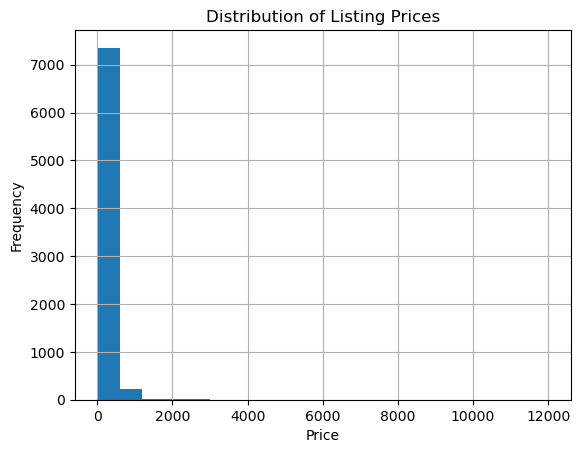

In [15]:
#visualization
data['price'].hist(bins = 20)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Price')

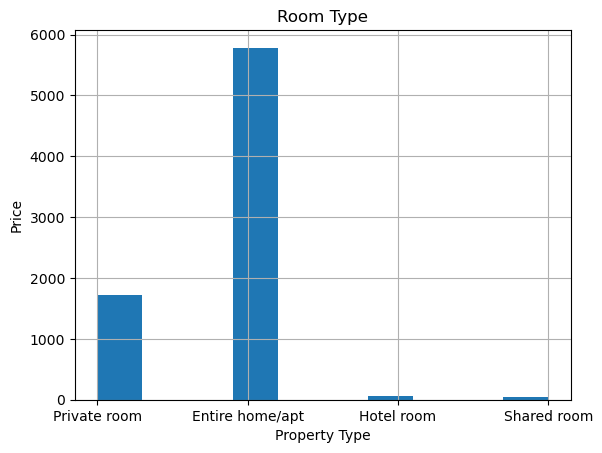

In [16]:
data["room_type"].hist()
plt.title("Room Type")
plt.xlabel('Property Type')
plt.ylabel('Price')

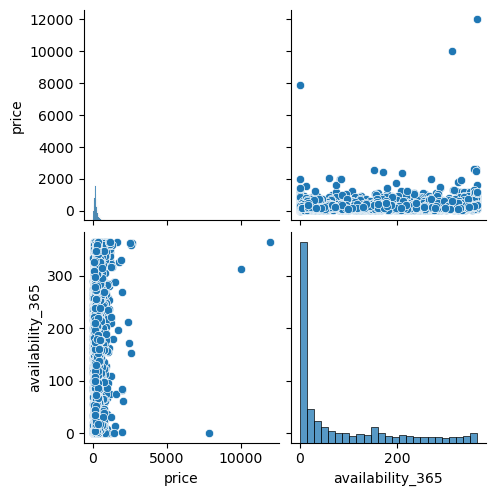

In [17]:
sns.pairplot(df)
plt.show()